<a href="https://colab.research.google.com/github/mizscrystal/Independent-Sample-Ttest/blob/main/Independent_sample_T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#independent T test
SaveWell = [2.5, 4.9, 3.7, 4.1, 3.8, 3.0, 2.7, 3.8, 5.2, 1.5]
SpendWise = [3.2, 9.2, 5.0, 2.9, 3.6, 3.9, 3.4, 2.5, 3.5, 3.5]

In [ ]:
# for data loading/wrangling
import numpy as np
import pandas as pd
# for stats tests
import scipy.stats as st
import statsmodels.api as sm
# for visualisations
from matplotlib import pyplot
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Question 1
H0: wait time at savewell = waittime at spendwise
H1: wait time at savewell <=  waittime at spendwise


Question 2
We will carry out a an independent sample T-test because, they are two independent test subjects (Savewell and spendWise). Further more we will carry out a test of normality to determine if this is to be an independent samples t test or the Mann Whitney U.

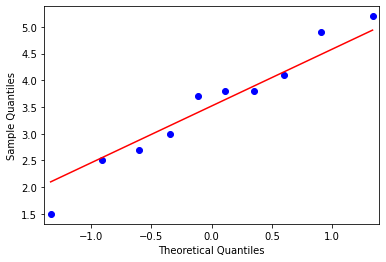

In [ ]:
fig = sm.qqplot(np.array(SaveWell), line='s')
pyplot.show()

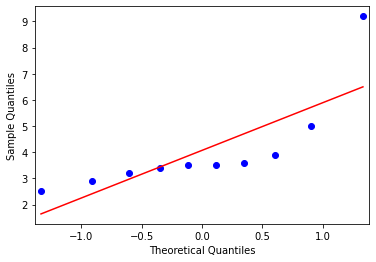

In [ ]:
fig = sm.qqplot(np.array(SpendWise), line='s')
pyplot.show()

We will next check for normality using the Shapiro-Wilk test. The null and alternative hypotheses of this test are:

    H0: The data are drawn from a normally-distributed population.

    Ha: The data are not drawn from a normally-distributed population.

For this test we will set the significance level α
to 0.05.

In [ ]:
normality_report = 'For {}, the test statistic is {:.3f} and the p value is {:.3f}'
statistic, pvalue = st.shapiro(SaveWell) 
print(normality_report.format('SaveWell',statistic,pvalue))

For SaveWell, the test statistic is 0.971 and the p value is 0.899


In [ ]:
normality_report = 'For {}, the test statistic is {:.3f} and the p value is {:.3f}'
statistic, pvalue = st.shapiro(SpendWise) 
print(normality_report.format('SpendWise',statistic,pvalue))

For SpendWise, the test statistic is 0.670 and the p value is 0.000


Our analysis produced a non significant P-vlaue, Hence, we can Conclude that our data was from a normally distributed population. SO, we will proceed to use the an independent samples t test.

Futhermore, we will perform a Levene’s test to check for Equality of variance.
The null and alternative hypotheses of this test are:


    H0: The variances of the populations from which the samples are drawn are equal - equality of variance (homoscedasticity) is present.

    Ha: The variances of the populations from which the samples are drawn are not equal - unequal variance (heteroscedasticity) is present.

Once again, we will use a significance level α
of 0.05, meaning that the probability of falsely rejecting the null hypothesis of equal variance when in fact it is true is 5%.

In [ ]:
homoscedasticity_report = 'The test statistic is {:.3f} and the p value is {:.3f}'

statistic, pvalue = st.levene(
    SaveWell,
    SpendWise)

print(homoscedasticity_report.format(statistic,pvalue))

The test statistic is 0.048 and the p value is 0.829


At α=0.05, The test produced a non-significant result. So we will conclude that our test is independent samples t test for equal variances ( Student’s t-test.).
Also, because our test is less than (one direction). It is called a one tail test.

Question 1c
For our Alpha Value, We will be using 0.05. This is because with a lower alpha vlaue, the probability of commiting a type 1 error is less. 


In [ ]:
#Question 1D
#Table of summary Statistics
df = pd.DataFrame({'SaveWell':SaveWell,'SpendWise':SpendWise})
df.describe()

,SaveWell,SpendWise
count,10.000000,10.000000
mean,3.520000,4.070000
std,1.121309,1.918362
min,1.500000,2.500000
25%,2.775000,3.250000
50%,3.750000,3.500000
75%,4.025000,3.825000
max,5.200000,9.200000


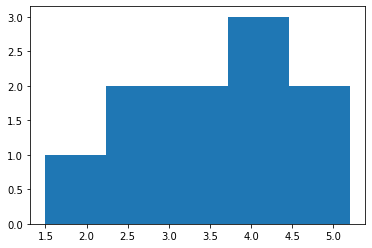

In [ ]:
#Question 1E
fig = pyplot.hist(SaveWell, bins=5)
pyplot.show()

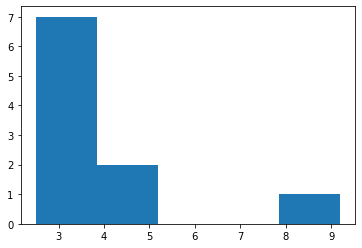

In [ ]:
fig = pyplot.hist(SpendWise, bins=5)
pyplot.show()

In [ ]:
dflong = pd.DataFrame(
    {'Group': ['SaveWell']*10 + ['SpendWise']*10,
    'Attention': SaveWell + SpendWise}
)
dflong

,Group,Attention
0,SaveWell,2.5
1,SaveWell,4.9
2,SaveWell,3.7
3,SaveWell,4.1
4,SaveWell,3.8
5,SaveWell,3.0
6,SaveWell,2.7
7,SaveWell,3.8
8,SaveWell,5.2
9,SaveWell,1.5


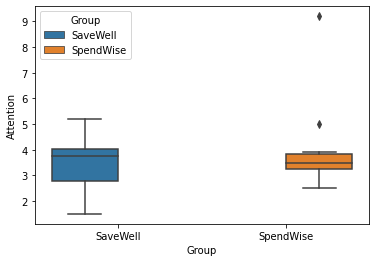

In [ ]:
sns.boxplot(x='Group', y='Attention', hue='Group', data=dflong)

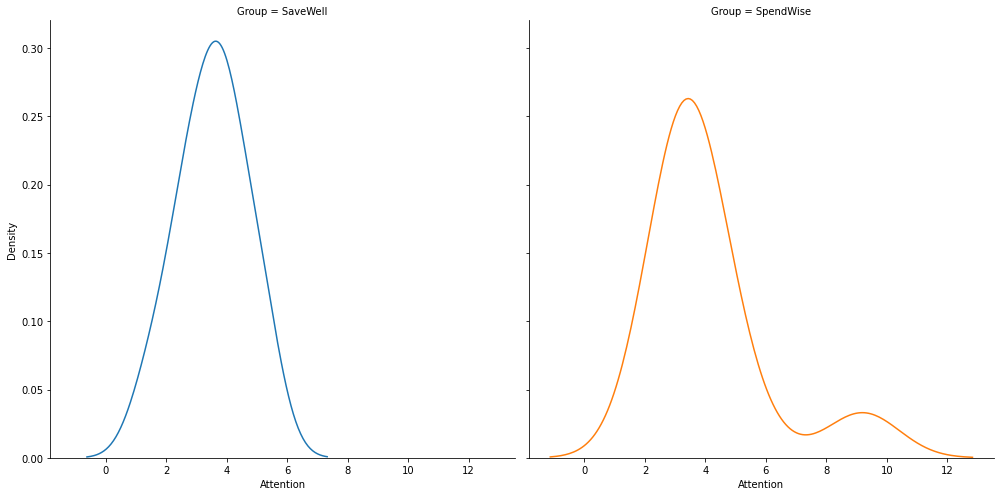

In [ ]:
grid = sns.FacetGrid(
    dflong, 
    col='Group', 
    col_wrap=2,  
    hue='Group', 
    height=7     
)
grid.map(sns.kdeplot,'Attention')

In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
statistic, p_value = st.ttest_ind(
    SaveWell,                #First Sample 
    SpendWise,             #Second Sample 
    alternative="less", 
    equal_var=True) # One-tailed test
                             
         # Student's t test
fmt_string = "Independent samples two-tailed t-test.\nTest statistic: {:.3f}, Critical value:{:.3f}, p: {:.3f}"
print(fmt_string.format(statistic, st.t.ppf(0.05/2, df=len(SaveWell)+len(SpendWise)-2), p_value))







Independent samples two-tailed t-test.
Test statistic: -0.783, Critical value:-2.101, p: 0.222


Conclusions
Test statistic: -0.783, Critical value:-2.101, p: 0.222. Since -0.783 is less extreme than -2.101, We fail to reject the null hypothesis and conclude that the waiting time for both places is equal.

We can also compare the returned p value of 0 with our chosen significance (α=0.05). As p>α we fail to reject the null hypothesis.

Question 1H

As we have failed to reject the null hypothesis, the possibility that we have accpeted the null hypothesis when it is infact wrong would lead to a type II error. 
With a P-value of 0.222, which is the probabilty that we have infact commited a type II error. *italicised text*